#  **Segmenting Agricultural Lands**




# 📋 **Business Objective Understanding**

## 🎯 **1 .Objective:**
To segment agricultural lands in Tunisia for agricultural businesses, enabling better decision-making for investment, development, and utilization of these lands.

---

### ❓ **Key Questions to Address:**
- 📌 **What are the key factors influencing land prices?**  
- 📌 **How can we categorize lands based on their features (e.g., proximity to the sea, infrastructure, type of agriculture)?**  
- 📌 **What are the trends in land prices over time and across regions?**  
- 📌 **How can we identify the most profitable or suitable lands for specific agricultural businesses?**  

---

# 📊 **2. Data Acquisition**

## 🗂 **2.1. Data Source**
- **Source:** Tunisie Annonce  
- **Data Type:** Scraped data containing agricultural land listings.  
- **Fields:** Gouvernorat, Délégation, Localité, Texte annonce, Prix, Date.  

---


## 🛠 **2.2. Data Collection Process**
- **Web Scraping:** Use tools like Python's `BeautifulSoup` or `Scrapy` to scrape the website.  
- **Target:** Extract all agricultural land listings.  
- **Fields to Scrape:**  
  - Gouvernorat  
  - Délégation  
  - Localité  
  - Texte annonce  
  - Prix  
  - Date  
- **Data Storage:** Store the scraped data in a structured format (e.g., CSV, SQL database).  
- **Data Cleaning:** Handle missing values, duplicates, and inconsistencies.  

---

**Install Required Libraries**

In [24]:
!pip install pandas matplotlib seaborn folium plotly scikit-learn
!pip install geopy

**Import Libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
import re
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 📝 **2.3. Data Sample**



In [45]:
# Load the data into a DataFrame
df1 = pd.read_csv("lands_prices_tn.csv")
df1['Prix'] = df1['Prix'].str.replace(r'\s+', '', regex=True)
df2 = pd.read_csv("Land_Prices_9annas.csv")

# Combiner les deux fichiers
df = pd.concat([df1, df2], ignore_index=True)

# Supprimer les doublons si nécessaire
df = df.drop_duplicates()

# Sauvegarder le fichier combiné (optionnel)
df.to_csv("lands_prices.csv", index=False)

# Afficher un aperçu
df.head()

,Gouvernorat,Délégation,Localité,Texte annonce,Prix,Date
0,Nabeul,Hammam El Ghezaz,Tamazrat,5000 mètre carré au bord de la mer tamazratun...,2500000,10/03/2025
1,Nabeul,Hammam El Ghezaz,Hammam Jebli,Bonne occasion de hammam jebli au bord dela me...,1819000,10/03/2025
2,Sousse,Hergla,Hergla,Terrain 414m zone des villas à hergla#offre #l...,103500,15/08/2024
3,Nabeul,Hammam El Ghezaz,Ezzahra,Un terrain de 980 mètre carré a ezzahraa vendr...,1470000,10/03/2025
4,Nabeul,Hammam El Ghezaz,Hammam El Ghezaz,Bonne affaire de terrain de 745 mètre carréon ...,1266500,10/03/2025


# 📊 **3. Data Understanding**

---

## 🔍 **3.1. Data Exploration**
- **Gouvernorat:** The region where the land is located.  
- **Délégation:** Sub-region or district.  
- **Localité:** Specific locality or village.  
- **Texte annonce:** Description of the land, including features like size, proximity to amenities, and type of agriculture.  
- **Prix:** Price of the land.  
- **Date:** Date of the listing.  

---

In [46]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6802 entries, 0 to 6860
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gouvernorat    6802 non-null   object
 1   Délégation     6802 non-null   object
 2   Localité       6802 non-null   object
 3   Texte annonce  6802 non-null   object
 4   Prix           6802 non-null   object
 5   Date           6802 non-null   object
dtypes: object(6)
memory usage: 372.0+ KB


In [29]:
# Descriptive statistics
df.describe()

,Gouvernorat,Délégation,Localité,Texte annonce,Prix,Date
count,6802,6802,6802,6802,6802,6802
unique,24,233,373,6794,818,356
top,Nabeul,Hammam El Ghezaz,Hammam El Ghezaz,Offre de terrain de 1070 mètre carré vendre un...,63000,03/04/2025
freq,5205,2162,1576,2,463,1170


In [47]:
# Check for missing values
df.isnull().sum()

,0
Gouvernorat,0
Délégation,0
Localité,0
Texte annonce,0
Prix,0
Date,0


In [48]:
# Unique values in categorical columns
print("Unique Gouvernorats:", df['Gouvernorat'].unique())
print("Unique Délégations:", df['Délégation'].unique())

Unique Gouvernorats: ['Nabeul' 'Sousse' 'Zaghouan' 'Sfax' 'Manouba' 'Bizerte' 'Ben arous'
 'Ariana' 'Le Kef' 'Kairouan' 'Medenine' 'Jendouba' 'Gafsa' 'Siliana'
 'Beja' 'Tataouine' 'Kasserine' 'Gabes' 'Tunis' 'Kebili' 'Sidi bouzid'
 'Mahdia' 'Monastir' 'Tozeur']
Unique Délégations: ['Hammam El Ghezaz' 'Hergla' 'Kelibia' 'El Fahs' 'Bir Mcherga' 'Akouda'
 'El Haouaria' 'Kalaa Essghira' 'Menzel Temime' 'Hammamet' 'Zaghouan'
 'Agareb' 'Soliman' 'Beni Khalled' 'Oued Ellil' 'Sfax Sud' 'Mateur'
 'Kalaa El Kebira' 'Fouchana' 'Mnihla' 'Bizerte Sud' 'Menzel Bouzelfa'
 'Sidi Thabet' 'Korba' 'Sidi Bou Ali' 'Ras Jebel' 'Bou Ficha' 'Mornag'
 'Ghar El Melh' 'Beni Khiar' 'Enfidha' 'Dar Chaabane Elfehri' 'Le Kef Est'
 'Sakiet Eddaier' 'Bou Argoub' 'Le Kef Ouest' 'Sbikha' 'Raoued'
 'Sousse Riadh' 'Menzel Bourguiba' 'Hammam Zriba' 'Hammam Sousse'
 'Djerba - Houmet Essouk' 'Bou Salem' 'Nabeul' 'Gafsa Nord' 'Sfax Ville'
 'Siliana Sud' 'Mejez El Bab' 'Remada' 'Menzel Chaker' 'Utique'
 'Oueslatia' 'Feriana' '

## 🛠 **3.2. Key Features Extraction**
From the **Texte annonce**, we can extract:
- 📏 **Size of the land:** (m² or hectares).   
- 🌊 **Proximity to key locations:** (mer, centre-ville, etc.).
- ⚡ **Infrastructure availability:** (électricité, eau, etc.).
- 🌱 **Type of agriculture:** (olive trees, fruit trees, etc.).
- 🏡 **Additional features:** (bâtiments existants, clôtures, etc.).  
---

In [81]:
data=df.copy()

# Nettoyage des textes : Supprimer les caractères spéciaux inutiles et normaliser
data['Texte annonce'] = data['Texte annonce'].str.replace(r'[^\w\s]', ' ', regex=True).str.lower().str.strip()

def normalize_number(match):
    # Supprime les espaces et virgules dans le nombre capturé
    number = match.group(1).replace(" ", "").replace(",", "")
    unit = match.group(2)
    # Normalise les unités
    if unit.lower() in ["m2", "m²", "mètre carré", "mètres carrés", "m carré"]:
        return f"{number} m²"
    elif unit.lower() in ["hectare", "hectares", "ha", "hect"]:
        return f"{number} ha"
    else:
        return f"{number} {unit}"

# Define functions to extract information
def extract_size(text):
    match = re.search(r'(\d+(?:[,\s]?\d+)*(?:\s?(?:m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare|m\b)))', text, re.IGNORECASE)
    return match.group(0) if match else None

def extract_size_v2(text):
    # Cas spécifique : "4 هكتارات"
    if "هكتارات" in text:
        match = re.search(r'(\d+)\s*هكتارات', text)
        if match:
            return f"{match.group(1)} ha"

    # Cas spécifique : "250m2"
    match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Autres cas
    return extract_size(text)
    # Cas spécifique : "1000 mètre carré"
    match = re.search(r'(\d+)\s*mètre\s*carré', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 mètres carrés"
    match = re.search(r'(\d+)\s*mètres\s*carrés', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 m"
    match = re.search(r'(\d+)\s*m\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 mètres"
    match = re.search(r'(\d+)\s*mètres', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000m carré"
    match = re.search(r'(\d+)m\s*carré', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000m²"
    match = re.search(r'(\d+)m²', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 m²"
    match = re.search(r'(\d+)\s*m²', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 hectares"
    match = re.search(r'(\d+)\s*hectares', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 ha"
    match = re.search(r'(\d+)\s*ha\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 hect"
    match = re.search(r'(\d+)\s*hect\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 hectare"
    match = re.search(r'(\d+)\s*hectare', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Autres cas
    return extract_size(text)

    # Cas spécifique : "250m2"
    match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Autres cas
    return extract_size(text)

# Exemple de filtre pour capturer des formats spécifiques
def extract_size_v3(text):
    pattern = re.compile(r'(\d{1,3}(?:[ ,]?\d{3})*)\s*(m2|m²|mètre carré|mètres carrés|m carré|hectare|hectares|ha|hect)', re.IGNORECASE)
    match = pattern.search(text)
    if match:
        return normalize_number(match)
    return extract_size_v2(text)

import re

def extract_proximity(text):
    # Expression régulière générale pour capturer les noms de lieux dynamiquement
    match = re.search(r'\b(proche de la mer|près de la mer|bord de mer|vue sur mer|à quelques mètres de la mer|'
                      r'centre-ville|proche du centre|près du centre|zone urbaine|quartier résidentiel|'
                      r'zone touristique|proche des commerces|'
                      r'à \d+ (?:km|mètres?|min) de (?!la\.\.\.)[\w\s\'-]+|'
                      r'à l\'arrière de [\w\s\'-]+|front de mer)\b',
                      text, re.IGNORECASE)

    # Retourne None si le match est incomplet (comme "À 42 km de la...")
    return match.group(0) if match else None


def extract_infrastructure(text):
    match = re.findall(r'\b(électricité|réseau électrique|eau|alimentation en eau|gaz|téléphone|système d\'irrigation|'
                       r'réservoir d\'eau|connexion internet|fibre optique|assainissement|tout-à-l’égout|voirie|'
                       r'sondage|forage|puit)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None

def extract_agriculture_type(text):
    match = re.findall(r'\b(oliviers?|vignes?|arbres fruitiers?|céréales?|orangers?|palmiers?|blé|vigne|verger|'
                       r'grenadiers?|figuiers?|arbres?|cultures?|jardin|plantation)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None

def extract_additional_features(text):
    match = re.findall(r'\b(bâtiment|clôture|maison|piscine|puit|garage|serre|dépôt|'
                       r'hangar|grange|mur de clôture|entrepôt|entrepot|pergola|atelier|duplex|villa|'
                       r'titre foncier|papiers en règle)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None



# Apply extraction functions to the "Texte annonce" column
data['Taille'] = data['Texte annonce'].apply(extract_size_v3)
data['Proximité'] = data['Texte annonce'].apply(extract_proximity)
data['Infrastructure'] = data['Texte annonce'].apply(extract_infrastructure)
data['Type_Agriculture'] = data['Texte annonce'].apply(extract_agriculture_type)
data['Additional_Features'] = data['Texte annonce'].apply(extract_additional_features)

# Display a sample of the updated dataframe to verify the extraction
data.head()


,Gouvernorat,Délégation,Localité,Texte annonce,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features
0,Nabeul,Hammam El Ghezaz,Tamazrat,5000 mètre carré au bord de la mer tamazratun...,2500000,10/03/2025,5000 m²,None,None,None,titre foncier
1,Nabeul,Hammam El Ghezaz,Hammam Jebli,bonne occasion de hammam jebli au bord dela me...,1819000,10/03/2025,1415 m²,None,None,None,titre foncier
2,Sousse,Hergla,Hergla,terrain 414m zone des villas à hergla offre l...,103500,15/08/2024,414 m²,None,eau,None,None
3,Nabeul,Hammam El Ghezaz,Ezzahra,un terrain de 980 mètre carré a ezzahraa vendr...,1470000,10/03/2025,980 m²,None,None,None,titre foncier
4,Nabeul,Hammam El Ghezaz,Hammam El Ghezaz,bonne affaire de terrain de 745 mètre carréon ...,1266500,10/03/2025,745 m²,None,None,None,titre foncier


## 🧼 **3.3. Data Cleaning**

In [82]:
# Delete data without size
data.dropna(subset=['Taille'], inplace=True)

# Delete "Texte annonce" column
data.drop(columns=['Texte annonce'], inplace=True)

In [83]:
# Gestion des doublons : Supprimer les lignes en double
data = data.drop_duplicates()

In [84]:
# Nettoyage de la colonne "Prix" : Supprimer les espaces et convertir en numérique

data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Suprimmer la colonne date
#data.drop(columns=['Date'], inplace=True)

data.head()

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features
0,Nabeul,Hammam El Ghezaz,Tamazrat,2500000,2025-03-10,5000 m²,None,None,None,titre foncier
1,Nabeul,Hammam El Ghezaz,Hammam Jebli,1819000,2025-03-10,1415 m²,None,None,None,titre foncier
2,Sousse,Hergla,Hergla,103500,2024-08-15,414 m²,None,eau,None,None
3,Nabeul,Hammam El Ghezaz,Ezzahra,1470000,2025-03-10,980 m²,None,None,None,titre foncier
4,Nabeul,Hammam El Ghezaz,Hammam El Ghezaz,1266500,2025-03-10,745 m²,None,None,None,titre foncier


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 0 to 6860
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Gouvernorat          4172 non-null   object        
 1   Délégation           4172 non-null   object        
 2   Localité             4172 non-null   object        
 3   Prix                 4172 non-null   int64         
 4   Date                 4172 non-null   datetime64[ns]
 5   Taille               4172 non-null   object        
 6   Proximité            792 non-null    object        
 7   Infrastructure       992 non-null    object        
 8   Type_Agriculture     827 non-null    object        
 9   Additional_Features  2719 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 358.5+ KB


## ⚙️ **3.4. Feature Engineering**
- 💰 **Price per m²:** Calculate the price per square meter for easier comparison.  
- 🔢 **Categorical Variables:** Convert categorical variables (e.g., *Gouvernorat*, *Délégation*) into numerical values using one-hot encoding or label encoding.  
- 📍 **Proximity Metrics:** Create binary features indicating proximity to key locations (e.g., sea, city).  


In [86]:
# Fonction pour convertir les tailles en m²
def convert_to_m2(size):
    if pd.isna(size):
        return None

    # Extraire la valeur numérique et l'unité
    match = re.search(r'(\d+(?:[,\s]?\d+)*)\s*(m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare)', str(size), re.IGNORECASE)
    if not match:
        return None

    # Nettoyer la valeur numérique en supprimant les espaces
    value_str = match.group(1).replace(' ', '').replace(',', '.')
    value = float(value_str)  # Convertir en float
    unit = match.group(2).lower()

    # Convertir en m²
    if unit in ['m²', 'm2', 'm carré', 'mètres carrés', 'mètre carré', 'm']:
        return value
    elif unit in ['ha', 'hectares', 'hectare', 'h', 'hect']:
        return value * 10000
    elif unit in ['pieds', 'pieds carrés', 'pied']:
        return value * 0.092903
    else:
        return None

# Appliquer la conversion à la colonne "Taille"
data['Taille_m2'] = data['Taille'].apply(convert_to_m2)

# Calculer le prix par m²
data['Prix_m2'] = data['Prix'] / data['Taille_m2']

# Afficher un échantillon du dataframe mis à jour
print(data[['Prix', 'Taille', 'Taille_m2', 'Prix_m2']].head())

      Prix   Taille  Taille_m2      Prix_m2
0  2500000  5000 m²     5000.0   500.000000
1  1819000  1415 m²     1415.0  1285.512367
2   103500   414 m²      414.0   250.000000
3  1470000   980 m²      980.0  1500.000000
4  1266500   745 m²      745.0  1700.000000


In [87]:
data

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Hammam El Ghezaz,Tamazrat,2500000,2025-03-10,5000 m²,None,None,None,titre foncier,5000.0,500.000000
1,Nabeul,Hammam El Ghezaz,Hammam Jebli,1819000,2025-03-10,1415 m²,None,None,None,titre foncier,1415.0,1285.512367
2,Sousse,Hergla,Hergla,103500,2024-08-15,414 m²,None,eau,None,None,414.0,250.000000
3,Nabeul,Hammam El Ghezaz,Ezzahra,1470000,2025-03-10,980 m²,None,None,None,titre foncier,980.0,1500.000000
4,Nabeul,Hammam El Ghezaz,Hammam El Ghezaz,1266500,2025-03-10,745 m²,None,None,None,titre foncier,745.0,1700.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6856,Zaghouan,El Fahs,El Fahs,650000,2025-04-03,15 ha,None,"téléphone, sondage, puit",None,puit,150000.0,4.333333
6857,Nabeul,Dar Chaabane,Dar Chaabane,140000,2025-04-03,6800 m²,None,"téléphone, puit","oliviers, oranger, arbres",puit,6800.0,20.588235
6858,Bizerte,Mateur,Mateur,850000,2025-04-03,15 ha,None,"téléphone, sondage","oliviers, arbres",maison,150000.0,5.666667
6859,Nabeul,Al Haouaria,Al Haouaria,189000,2025-04-03,9734 m²,None,None,None,None,9734.0,19.416478


In [101]:
# Filtrer les données pour exclure les valeurs aberrantes
filtered_data = data[(data['Prix_m2'] <= 800) & (data['Prix_m2'] >= 10)]
filtered_data

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Hammam El Ghezaz,Tamazrat,2500000,2025-03-10,5000 m²,None,None,None,titre foncier,5000.0,500.000000
2,Sousse,Hergla,Hergla,103500,2024-08-15,414 m²,None,eau,None,None,414.0,250.000000
5,Nabeul,Hammam El Ghezaz,Ezzahra,90000,2025-03-10,1000 m,None,None,None,titre foncier,1000.0,90.000000
7,Nabeul,Kelibia,Kerkouane,1110000,2025-03-10,1850 m²,None,None,None,titre foncier,1850.0,600.000000
8,Zaghouan,El Fahs,Bent Saidane,860000,2024-09-23,7500 m²,à 45 min de route de tunis située dans un ...,None,None,None,7500.0,114.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
6844,Nabeul,Dar Allouche,Dar Allouche,22500,2025-04-03,150 m²,bord de mer,eau,None,None,150.0,150.000000
6846,Nabeul,Hammamet Sud,Hammamet Sud,175000,2025-04-03,7500 m²,à 6 km de la route principale gp1 hammamet sud...,"eau, électricité",oliviers,None,7500.0,23.333333
6854,Nabeul,Al Haouaria,Al Haouaria,750000,2025-04-03,7600 m²,None,"téléphone, sondage",None,None,7600.0,98.684211
6857,Nabeul,Dar Chaabane,Dar Chaabane,140000,2025-04-03,6800 m²,None,"téléphone, puit","oliviers, oranger, arbres",puit,6800.0,20.588235


## 📊 **4. Data Analysis**


### 📈 **4.1. Descriptive Statistics**  

- 💰 **Average Price:** Calculate the average price of lands per Gouvernorat.  
- 📉 **Price Distribution:** Analyze the distribution of prices across different regions.  
- 🌍 **Size Distribution:** Analyze the distribution of land sizes.

Gouvernorat
Ariana         142.933776
Beja            46.674278
Ben arous      111.721118
Bizerte        124.988178
Gabes           48.611111
Gafsa           16.375000
Jendouba        30.752828
Kairouan       111.716752
Kasserine       34.655465
Kebili          18.000000
Le Kef          19.500000
Mahdia          39.247729
Manouba         58.548365
Medenine       231.658283
Monastir       129.598478
Nabeul         238.326090
Sfax            33.929222
Sidi bouzid     30.000000
Siliana         65.233333
Sousse         136.677136
Tozeur          16.666667
Tunis           54.490753
Zaghouan        37.654313
Name: Prix_m2, dtype: float64


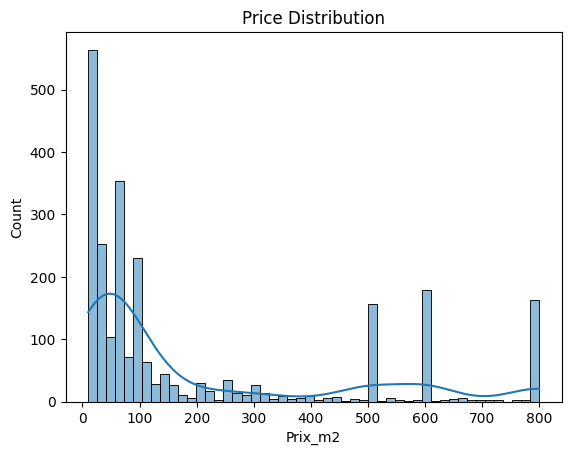

In [102]:
# Average price per Gouvernorat
avg_price_per_region = filtered_data.groupby('Gouvernorat')['Prix_m2'].mean()
print(avg_price_per_region)

# Price distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(filtered_data['Prix_m2'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

---

### 📅 **4.2. Trend Analysis**  
- 📊 **Price Trends Over Time:** Analyze how land prices have changed over time.

<ipython-input-103-1d62b9354a6b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_data['Prix_m2'].resample('M').mean().plot()


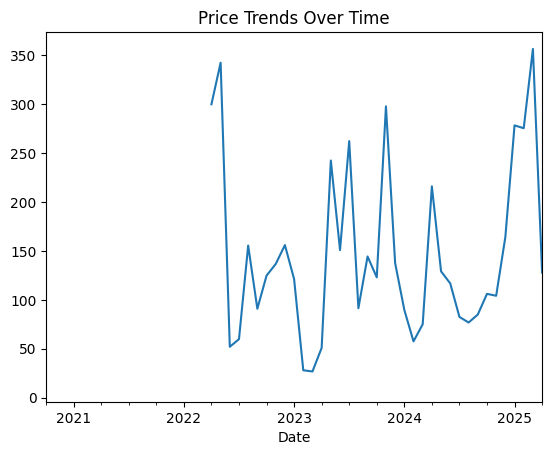

In [103]:
# Price trends over time
filtered_data.set_index('Date', inplace=True)
filtered_data['Prix_m2'].resample('M').mean().plot()
plt.title('Price Trends Over Time')
plt.show()

# 🧑‍💻 **5. Segmentation**

---

## 🧩 **5.1. Clustering**
- **K-Means Clustering:** Segment lands based on features like size, price, and proximity.  
- **Hierarchical Clustering:** Explore hierarchical relationships between lands.  

In [107]:
df1=filtered_data.copy()

# Fonction pour vérifier la proximité de la mer
def is_near_sea(proximite):
    if pd.isna(proximite):  # Gérer les valeurs manquantes
        return 0
    # Expression régulière pour capturer les motifs liés à la mer
    pattern = r'\b(proche de la mer|près de la mer|bord de mer|vue sur mer|à quelques mètres de la mer|front de mer|à l\'arrière de [\w\s\'-]+)\b'
    return 1 if re.search(pattern, str(proximite), re.IGNORECASE) else 0

# Fonction pour vérifier la proximité de la ville
def is_near_city(proximite):
    if pd.isna(proximite):  # Gérer les valeurs manquantes
        return 0
    # Expression régulière pour capturer les motifs liés à la ville
    pattern = r'\b(centre-ville|proche du centre|près du centre|zone urbaine|quartier résidentiel|zone touristique|proche des commerces)\b'
    return 1 if re.search(pattern, str(proximite), re.IGNORECASE) else 0

def has_infrastructure(infra):
    if pd.isna(infra):  # Gérer les valeurs manquantes
        return 0
    # Liste des infrastructures à vérifier
    pattern = r'\b(électricité|réseau électrique|eau|alimentation en eau|gaz|téléphone|système d\'irrigation|réservoir d\'eau|connexion internet|fibre optique|assainissement|tout-à-l’égout|voirie|sondage|forage|puit)\b'
    return 1 if re.search(pattern, str(infra), re.IGNORECASE) else 0

def is_delegation(delegation, target_delegation):
    if pd.isna(delegation):  # Gérer les valeurs manquantes
        return 0
    return 1 if str(delegation).strip().lower() == target_delegation.lower() else 0

def has_agriculture_type(agriculture):
    if pd.isna(agriculture):  # Gérer les valeurs manquantes
        return 0
    # Liste des types d'agriculture à vérifier
    pattern = r'\b(oliviers?|vignes?|arbres fruitiers?|céréales?|orangers?|palmiers?|blé|vigne|verger|grenadiers?|figuiers?|arbres?|cultures?|jardin|plantation)\b'
    return 1 if re.search(pattern, str(agriculture), re.IGNORECASE) else 0

def has_additional_feature(features):
    if pd.isna(features):  # Gérer les valeurs manquantes
        return 0
    # Liste des caractéristiques supplémentaires à vérifier
    pattern = r'\b(bâtiment|clôture|maison|piscine|puit|garage|serre|dépôt|hangar|grange|mur de clôture|entrepôt|entrepot|pergola|atelier|duplex|villa|titre foncier|papiers en règle)\b'
    return 1 if re.search(pattern, str(features), re.IGNORECASE) else 0

# Appliquer les fonctions pour créer les colonnes binaires
df1['Near_Sea'] = df1['Proximité'].apply(is_near_sea)
df1['Near_City'] = df1['Proximité'].apply(is_near_city)
df1['Has_Infrastructure'] = df1['Infrastructure'].apply(has_infrastructure)
df1['Has_Agriculture'] = df1['Type_Agriculture'].apply(has_agriculture_type)
df1['Has_Additional_Features'] = df1['Additional_Features'].apply(has_additional_feature)


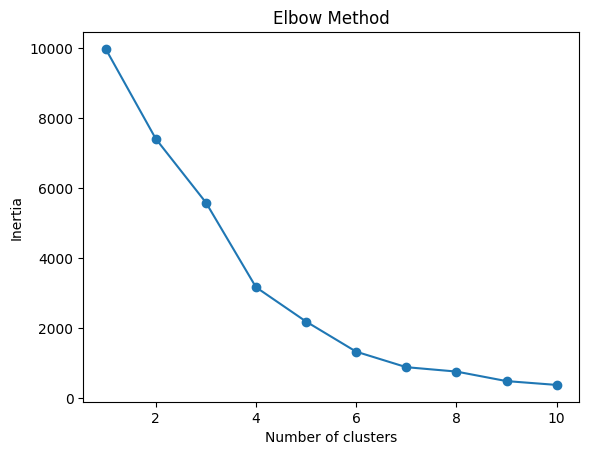

Silhouette Score: 0.6518892049541472


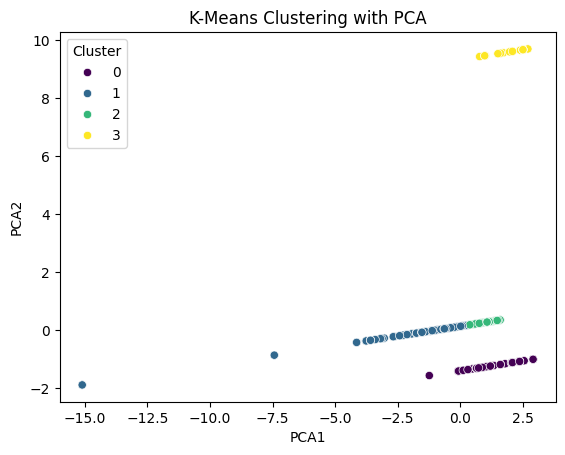

In [108]:
# Select features for clustering
features = df1[['Prix_m2', 'Taille_m2', 'Near_Sea', 'Near_City']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-Means clustering with optimal k
optimal_k = 4  # Replace with the optimal k from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df1['PCA1'] = reduced_features[:, 0]
df1['PCA2'] = reduced_features[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df1, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()

## 🗺 **5.2. Geographical Mapping**

In [ ]:
# Initialiser le géocodeur
geolocator = Nominatim(user_agent="tunisia_map")

# Créer une fonction pour géocoder une localité
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Ajouter les coordonnées au DataFrame
df1['Location'] = df1['Localité'].apply(geocode)
df1['Latitude'] = df1['Location'].apply(lambda loc: loc.latitude if loc else None)
df1['Longitude'] = df1['Location'].apply(lambda loc: loc.longitude if loc else None)

# Supprimer les lignes sans coordonnées
df1.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [ ]:
# Créer une carte centrée sur la Tunisie
tunisia_map = folium.Map(location=[34, 9], zoom_start=7)

# Ajouter des marqueurs pour chaque terrain
for idx, row in df1.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],  # Utiliser les colonnes Latitude et Longitude
        popup=f"Prix: {row['Prix']}, Taille: {row['Taille_m2']} m²",
        icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'green')
    ).add_to(tunisia_map)

# Enregistrer la carte
tunisia_map.save('lands_map.html')

# 📊 **6. Business Insights**

---

## 💰 **6.1. Investment Opportunities**
- Identify high-value lands based on location, price trends, and features.  
- Detect emerging areas for agricultural investment.  
- Compare price-per-m² across different regions.
---

## ⚠️ **6.2. Risk Assessment**
- Assess the stability of land prices over time.  
- Identify regions with fluctuating or declining land values.  
- Evaluate risks related to infrastructure, climate, and accessibility.  

In [109]:
# Trouver le cluster avec le prix moyen le plus élevé (haute valeur)
cluster_means = df1.groupby('Cluster')['Prix_m2'].mean()
high_value_cluster = cluster_means.idxmax()

# Trouver le cluster avec le prix moyen le plus bas (faible valeur)
low_value_cluster = cluster_means.idxmin()

# Filtrer les données pour ces clusters
high_value_lands = df1[df1['Cluster'] == high_value_cluster]
low_value_lands = df1[df1['Cluster'] == low_value_cluster]

print("High-value cluster:", high_value_cluster)
print(high_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

print("\nLow-value cluster:", low_value_cluster)
print(low_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

High-value cluster: 2
           Gouvernorat        Délégation     Prix_m2  Taille_m2
Date                                                           
2025-03-10      Nabeul  Hammam El Ghezaz  500.000000     5000.0
2025-03-10      Nabeul           Kelibia  600.000000     1850.0
2025-03-10      Nabeul           Kelibia  800.000000      990.0
2025-03-10      Nabeul  Hammam El Ghezaz  500.000000     3000.0
2025-03-10      Nabeul           Kelibia  800.000000      840.0
...                ...               ...         ...        ...
2025-04-03    Medenine     Djerba Midoun  421.428571      700.0
2025-04-03      Sousse            Akouda  337.620579      311.0
2025-04-03      Nabeul      Hammamet Sud  482.758621      580.0
2025-04-03    Medenine             Arkou  600.000000      613.0
2025-04-03    Medenine     Djerba Midoun  600.000000      613.0

[448 rows x 4 columns]

Low-value cluster: 1
           Gouvernorat        Délégation     Prix_m2  Taille_m2
Date                                

In [110]:
# Statistiques pour le cluster de haute valeur
print("High-value cluster statistics:")
print(high_value_lands[['Prix_m2', 'Taille_m2']].describe())

# Statistiques pour le cluster de faible valeur
print("\nLow-value cluster statistics:")
print(low_value_lands[['Prix_m2', 'Taille_m2']].describe())

High-value cluster statistics:
          Prix_m2   Taille_m2
count  448.000000   448.00000
mean   606.684582  1819.12500
std    135.316633  1085.32218
min    336.956522   100.00000
25%    500.000000   913.00000
50%    600.000000  1600.00000
75%    800.000000  2500.00000
max    800.000000  6200.00000

Low-value cluster statistics:
           Prix_m2      Taille_m2
count  1683.000000    1683.000000
mean     71.349203   16126.444444
std      67.756381   38589.367016
min      10.000000       5.000000
25%      21.583333    1000.000000
50%      55.632823    5000.000000
75%      90.000000   17000.000000
max     320.000000  800000.000000


---

# 📈 **7. Visualization**

In [111]:
# Interactive scatter plot with a title
fig = px.scatter(df1, x='Prix_m2', y='Taille_m2', color='Cluster',
                 hover_data=['Gouvernorat', 'Délégation'],
                 title='Interactive Scatter Plot of Prix_m2 vs Taille_m2 by Cluster')

fig.show()

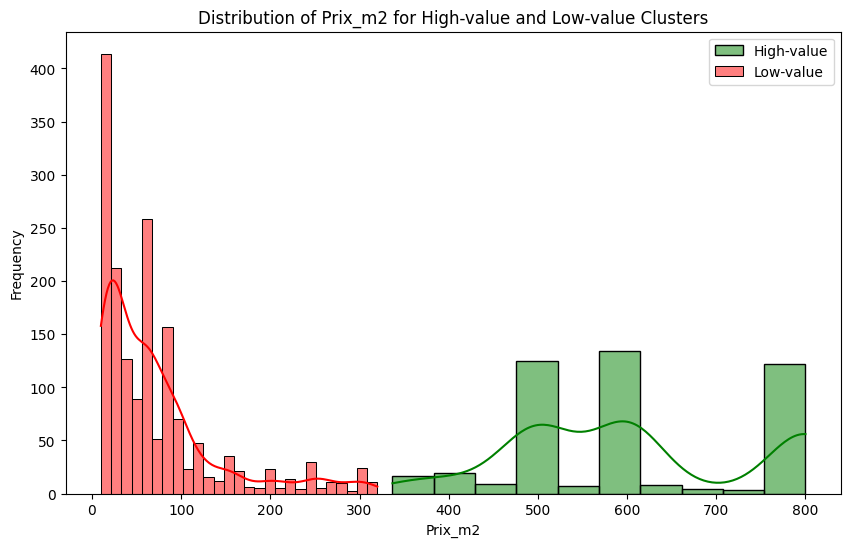

In [112]:
# Distribution des Prix_m2 pour les clusters de haute et faible valeur
plt.figure(figsize=(10, 6))
sns.histplot(high_value_lands['Prix_m2'], color='green', label='High-value', kde=True)
sns.histplot(low_value_lands['Prix_m2'], color='red', label='Low-value', kde=True)
plt.xlabel('Prix_m2')
plt.ylabel('Frequency')
plt.title('Distribution of Prix_m2 for High-value and Low-value Clusters')
plt.legend()
plt.show()

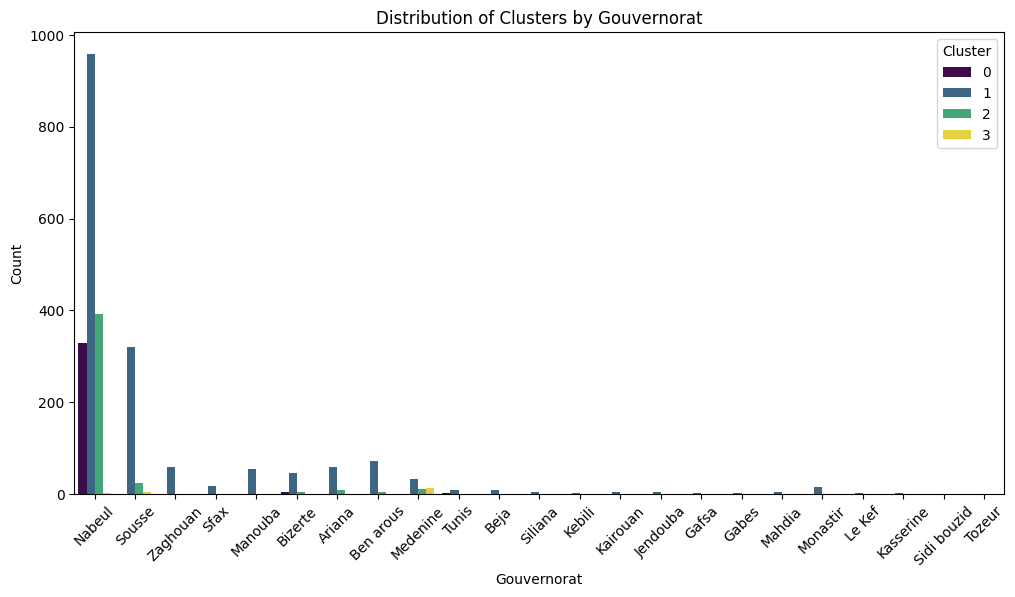

In [113]:
# Répartition des clusters par Gouvernorat
plt.figure(figsize=(12, 6))
sns.countplot(x='Gouvernorat', hue='Cluster', data=df1, palette='viridis')
plt.xlabel('Gouvernorat')
plt.ylabel('Count')
plt.title('Distribution of Clusters by Gouvernorat')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

<ipython-input-114-aac639ae416a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




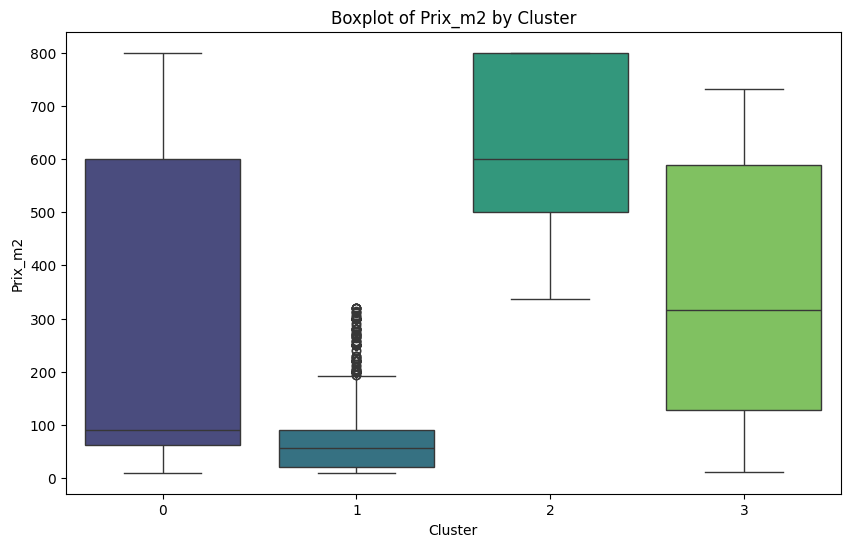

In [114]:
# Boxplot des Prix_m2 par Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Prix_m2', data=df1, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Prix_m2')
plt.title('Boxplot of Prix_m2 by Cluster')
plt.show()

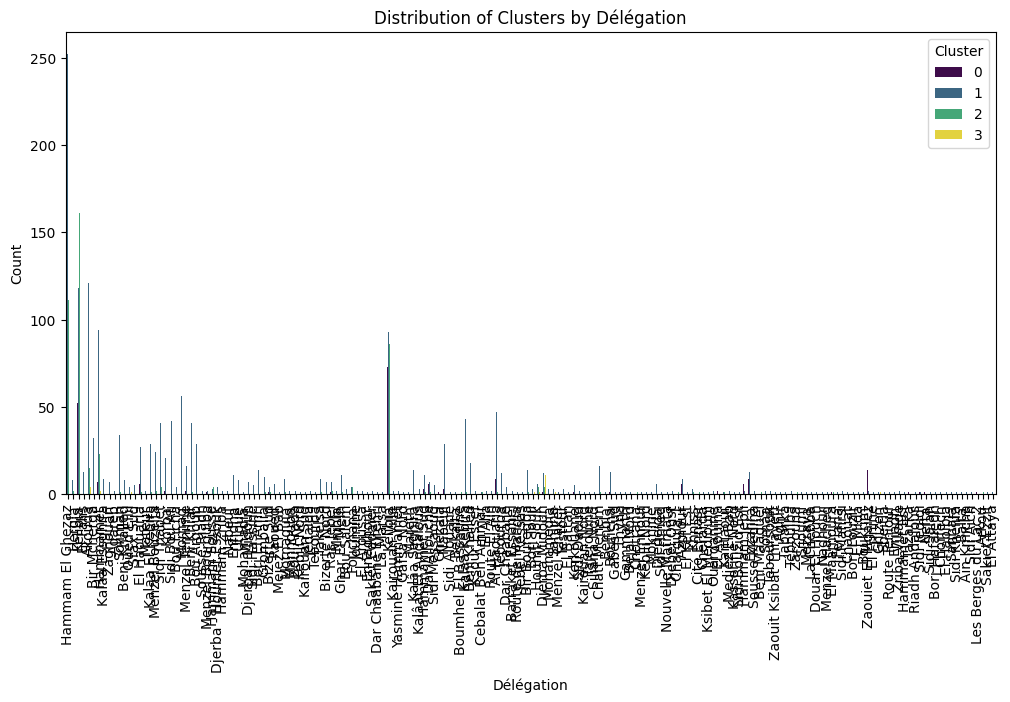

In [115]:
# Répartition des délégations pour les clusters de haute et faible valeur
plt.figure(figsize=(12, 6))
sns.countplot(x='Délégation', hue='Cluster', data=df1, palette='viridis')
plt.xlabel('Délégation')
plt.ylabel('Count')
plt.title('Distribution of Clusters by Délégation')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()